# 문제정의(목표설정)
- 손글씨를 분류하는 모델을 만들어보자.
- 예측의 불확실성을 확인해보자.
- 이미지 데이터에 형태를 이해해보자.
- 다양한 분류평가지표를 이해해보자.

# 데이터 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./data/digit_train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(42000, 785)

- pixel: 하나의 픽셀 안에 RGB 데이터를 담고 있음 
- 28x28 size의 이미지를 한줄로 세워서 1차원 데이터로 만듬

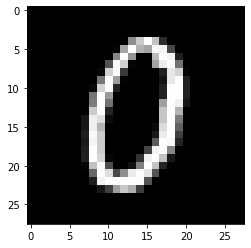

In [4]:
#이미지 확인
img = data.iloc[5,1:]
img_reshape=img.values.reshape(28,28)
#.values시리즈나 판다스에서 넘파이로 바꾸는 법)
#.reshape모양 바꾸는 법

plt.imshow(img_reshape, cmap='gray')  #흑백 데이터 

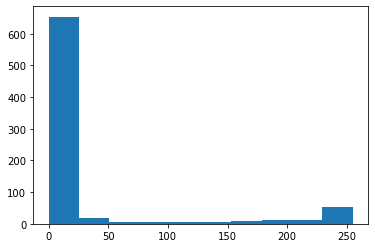

In [5]:
#데이터 분포 확인
plt.hist(img)
plt.show()

# 손글씨 정답의 종류

In [6]:
data["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

### 훈련용 데이터와 검증용 데이터 분리

In [7]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=728,test_size=0.3)

# 모델링
- KNN
- Decision Tree
- Logistic Regression
- SVM
- SGD

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [9]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,y_train)

logi_model=LogisticRegression()
logi_model.fit(X_train,y_train)

svc_model=LinearSVC()
svc_model.fit(X_train,y_train)

sgd_model=SGDClassifier()
sgd_model.fit(X_train,y_train)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SGDClassifier()

In [10]:
knn_model.score(X_test,y_test)

0.9671428571428572

In [11]:
tree_model.score(X_test,y_test)

0.8489682539682539

In [12]:
logi_model.score(X_test,y_test)

0.9137301587301587

In [13]:
svc_model.score(X_test,y_test)  

0.8659523809523809

In [14]:
sgd_model.score(X_test,y_test)

0.8790476190476191

## 교차검증 활용 점수 확인
- 반드시 평균을 내서 점수를 확인해야함

In [15]:
from sklearn.model_selection import cross_val_score 

X1 = data.iloc[:,1:]
y1 = data.iloc[:,0]

In [16]:
np.mean(cross_val_score(knn_model, X1, y1, cv=3))

0.9642142857142857

In [17]:
np.mean(cross_val_score(tree_model, X1, y1, cv=3))

0.8467857142857143

In [18]:
np.mean(cross_val_score(logi_model, X1, y1, cv=3))

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9128095238095238

In [19]:
np.mean(cross_val_score(svc_model, X1, y1, cv=3))

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8509047619047619

In [20]:
np.mean(cross_val_score(sgd_model, X1, y1, cv=3))

0.8800476190476191

## 스케일링 추가

In [21]:
from sklearn.preprocessing import MinMaxScaler
mM_scaler = MinMaxScaler()

In [22]:
X2 = mM_scaler.fit(X1).transform(X1)

In [23]:
# X2 = mM_scaler.transform(X1)   #transform() : 특정열에 함수를 적용할 수 있게 해주는 함수 (apply() 비슷한건가?)

In [24]:
np.mean(cross_val_score(knn_model, X2, y1, cv=3))

0.9641904761904762

In [25]:
np.mean(cross_val_score(tree_model, X2, y1, cv=3))  #Decision Tree 는 스케일링 영향 안받음

0.848047619047619

In [26]:
np.mean(cross_val_score(logi_model, X2, y1, cv=3))  #logi 역시 스케일링 영향 많이 안받음

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9162857142857144

In [27]:
np.mean(cross_val_score(svc_model, X2, y1, cv=3))   # SVC 스케일링 영향 많이 받음 반드시 해주는 게 좋음

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\AI\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9077380952380952

In [28]:
np.mean(cross_val_score(sgd_model, X2, y1, cv=3))   # 경사하강법은 스케일링에 약간의 영향을 받음 (단, 스케일링 하면 속도가 빨라짐)

0.9062619047619048

- transform() 은 연산 가능한 컬럼만 알아서 필터링 된다.
- apply() 는 컬럼을 명시하지 않으면 에러가 발생한다. 알아서 연산 불가능한 컬럼을 필터링해주지 않는 것이다.

### 예측의 불확실성 확인
- 분류모델들은 예측 결과를 정하기전에 항상 확률을 계산한다.
- 분류모델이 예측한 값이 같더라도 확신의 정도(불확실성)가 전부 다르다.

In [63]:
logi_model4= LogisticRegression()
logi_model4.fit(X_train,y_train)
pre = logi_model4.predict(X_test)
pre

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([7, 8, 0, ..., 1, 8, 6], dtype=int64)

In [30]:
pre_proba = logi_model4.predict_proba(X_test)
pre_proba[0]
#predict_proba : 확률에 대한 예측을 알아보는 함수 Q.
#부동소수점 표기법(실수가 너무 크니까 조금 압축해서 표현하는 방법 Q.
                # e-n이면 소수점을 왼쪽으로 (n번) 이동시켜라 / e+n이면 소수점을 오른쪽으로 n번 이동시켜라
# logi 모델은 클래스별로 확률을 뽑음 그래서 숫자가 10개임

array([3.11558278e-04, 6.24913195e-16, 1.44809349e-08, 3.34688120e-05,
       2.29328889e-06, 3.77046576e-02, 2.90272570e-08, 6.88094921e-01,
       3.56026156e-04, 2.73497032e-01])

# 모델 평가하기 (145p)
- 정확도(Accuracy): 전체 중에 정확히 맞춘 비율 (TP+TN)/(TP+TN+FP+FN)   
- (정확도로만 보면 민감도와 특이도가 0인 경우도 정확도가 높게 나오는 경우가 있어서 정확하지 않음)
- 오차행렬(Confusion Matrix):
    - 민감도(재현율 Recall) : 참인 것 중에 맞춘 참의 비율 TP/(TP+FN) 
    - 정밀도(Precision): 예측 양성 중에서 실제 양성 비율 TP/(TP+FP)
    - 특이도 : 거짓 중에 맞춘 거짓의 비율 TN/(TN+FP)
    
- F1 socre : 정밀도와 재현율의 조화평균( F = 2precision*recall / (precision+recall) )\

    - 낮은 재현율 보다 높은 정밀도를 선호하는 경우(깐깐함)
        - 어린아이에게 안전한 동영상(양성)을 걸러내는 분류기를 훈련시킬 경우좋은 동영상이 많이 제외되더라도(낮은 재현율) 안전한 것들만 노출시키는(높은 정밀도) 분류기가 더 좋다.
    - 낮은 정밀도 보다 높은 재현율을 선호하는 경우(털털한): 
        - 감시 카메라로 좀도둑(양성)을 잡아내는 분류기를 훈련시키는 경우 경비원이 잘못된 호출을 종종 받지만(낮은 정밀도) 거의 모든 좀도둑을 잡는(높은 재현율)분류기가 더 좋다.
- ROC curve : 이진 분류일 때 활용하는 방법 (위양성률 != 특이도)  Q.
    - x축:위음성, y축:재현율로 그려지는데 그래프가 왼쪽 상단으로 올라면 올라갈수록 좋은 그래프이다.
    - FPR = FP/FP+TN (실제 거짓인 것 중에서 위양성) (특이도 + ROC = 1)
- ROC AUC : 위에 커브 그래프의 아래 밑 면적을 계산해서 나타내주는 것

## 오차행렬

In [64]:
num = [1, 2, 3, 4, 5, 6]
ans = ['음치', '음치', '음치', '음치', '가수', '가수']
pred = ['음치', '음치', '가수', '가수', '가수', '가수']
#음치가 양성
#진음성 : 2   #위양성 : 0
#위음성 : 2   #진양성 : 2
#정확도 : 66%
#재현율 : 50%
#정밀도 : 100%

In [57]:
from sklearn.metrics import confusion_matrix #오차행렬 
from sklearn.metrics import classification_report #분류평가지표를 리포팅


In [65]:
#confusion_matrix(실제값, 예측값) - 짝표
confusion_matrix(y_test, pre)

array([[1160,    1,    2,    4,    0,    7,   14,    4,    2,    1],
       [   0, 1374,    1,    5,    1,    3,    2,    2,   19,    1],
       [   9,   23, 1140,   29,   12,    4,   12,    9,   35,   12],
       [   4,    2,   38, 1194,    0,   34,    2,   12,   32,   16],
       [   4,    3,   11,    2, 1091,    2,   10,    5,   13,   50],
       [  19,    3,    5,   43,    8,  939,   26,   10,   37,   16],
       [  12,    2,   11,    1,   12,   16, 1198,    0,    6,    1],
       [   3,    2,   18,    7,   12,    1,    3, 1275,    4,   47],
       [  19,   28,   11,   31,   12,   36,    4,    9, 1074,   23],
       [  10,    3,    2,   15,   36,    8,    0,   49,   12, 1068]],
      dtype=int64)

In [67]:
# classification_report(실제값, 예측값)
print(classification_report(y_test, pre))   
#정확도, 정밀도, 재현율, F1socre 한번에 볼 수 있음
#support 데이터 개수를 의미

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1195
           1       0.95      0.98      0.96      1408
           2       0.92      0.89      0.90      1285
           3       0.90      0.90      0.90      1334
           4       0.92      0.92      0.92      1191
           5       0.89      0.85      0.87      1106
           6       0.94      0.95      0.95      1259
           7       0.93      0.93      0.93      1372
           8       0.87      0.86      0.87      1247
           9       0.86      0.89      0.88      1203

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(ans1, pred):
    confusion = confusion_matrix(ans, pred)
    accuarcy = accuracy_score(ans, pred)
    precision = precision_score(ans, pred)
    recall = recall_score(ans, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

get_clf_eval(ans, pre)

# 모델 활용하기

In [31]:
!pip install pillow

In [32]:
from PIL import Image
# PIL 이미지를 다룰 수 있는 라이브러리 (간단하게 다루는 것)
# 다른건 OpenCV가 있음

In [33]:
img = Image.open("./data/2.jpg").convert("L") #사진을 열어서 흑백채널로 변경

In [34]:
np_img = np.array(img) #모델에 넣을 수 있도록 numpy 배열로 변경
np_img.shape

(28, 28)

In [35]:
logi_model4.predict(np_img.reshape(1,784)) #학습 데이터 처럼 1차원으로 사진 펴주기

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([9], dtype=int64)

In [36]:
logi_model4.predict_proba(np_img.reshape(1,784))

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[5.89508028e-09, 1.40010318e-11, 7.88946871e-11, 1.88873285e-01,
        2.37839701e-06, 2.24683433e-07, 3.52347704e-05, 2.91480008e-04,
        4.47709921e-05, 8.10752620e-01]])